## Stats 504: Practice and Communication in Applied Statistics

Overall goal: Prepare students to provide master-level statistical support for collaborative, interdisciplinary work and research

- Communicating statistics with non-statistical experts
- Understanding statistical theory and limitations
- Data formatting and statistical programming
- Clear, effective writing
- Using graphics to communicate ideas

## About me
- Joint PhD at Carnegie Mellon University in Engineering & Public Policy and in Statistics & Data Science
- Second year postdoc at UM in the network statistics research group
- Worked as a master-level biostatistician for 5 years in HIV/STI research before PhD
 - 60% data formatting and cleaning
 - Collaborators expected me to also be an expert in HIV/STI, present at conferences
 - Needed to use methods I never learned before
 - Communicate statistical material with non-statistical experts
 - Gave me some real-world statistical background before my PhD

## Course Layout

- Lectures will be modeled as case studies
    - Exploratory Data Analysis (EDA)
    - Methods and strategies
    - Tips for communication
    - Code will be in either python3 or R


- [Canvas](https://umich.instructure.com/courses/516710)
    - submit assignments
    - get course materials
    - grading
    - lecture capture


- [iClicker](https://www.iclicker.com) mobile app to survey class
    - 5% of grade
    - 1 point for each lecture with 75% response rate


- [Github](https://github.com/omesner/UMSTATS504)
    - course materials
    - may be more up-to-date then canvas


- [Piazza](https://piazza.com/class/ky0bk6zt4jo792?cid=6)
    - Ask questions that will be helpful to the class


- [Zoom](https://umich.zoom.us/j/93271688199)
    - For when you are sick
    - In person is encouraged
    - Policies may change if in-person attendance is low


- Homework
    - Attempts to simulate work experience
    - Individual assignments are 3 pages (not including graphics/tables), well-written memo of finding for non-statistical audience
    - Group work is typically 5 pages
    - Must include reproducible code appendix (does not count toward page count), typically in Jupyter Notebook or Rmarkdown
    - Submitted through Canvas as a **single** PDF file


- [Writing tips](http://dept.stat.lsa.umich.edu/~kshedden/stats504/topics/writing_tips/)


- Reproducible code makes your work more transparent to others.  You will be required to submit your reproducible code: [Rmarkdown](https://rmarkdown.rstudio.com), [Jupyter notebook](https://jupyter.org)


- [Jupyter notebook tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/), [Rmarkdown tutorial](https://r4ds.had.co.nz/r-markdown.html)


- **Question**: Have you used either of these before?

    a. Yes
    
    b. No


- Assignments will be assess on writing quality, clarity, reproducible code, statistical correctness

### Student Well-Being

- Experiencing some amount of stress during graduate school is normal


- Too much stress can impact academic performance and personal well-being


- In academia, evaluation is necessary but also a significant source of stress for many


- In this course, we will be evaluating your writing quality, code, graphics, and tables


- Reading critiques can be difficult but are meant to help develop professional skills


- My goal is to develop your skills


- I want to be aware of the time assignments take


- I want your feedback


- Generally, if you are experiencing concerns related to this course or otherwise, please contact me (omesner@umich.edu) so that we can work on solutions


- Other [resources for student well-being](https://wellbeing.studentlife.umich.edu/resources-list)

## Case Study: Derogatory Credit Reports

- Our client is an economist working at a major credit card company


- She would like to identify factors that could potentially contribute to the number of derogatory reports on a credit card applicant's credit history


- The most common reasons for derogatory credit reports on an individual's credit history include missed payments, bankruptcy, repossessions, and foreclosures.


- Most individual reports will stay on someone’s credit history for up to seven years to ten years.


- The client's company collected data from individual credit card applications and other background information the company uses to determine the suitability of issuing a credit card to the applicant.


Data dictionary:

card - was the application for a credit card accepted?  The variables included contributed to determining this.

reports - number of derogatory reports

age -  applicant age in years at time of application

income - yearly income in 10,000 USD

share - ratio of monthly credit card expenditure to yearly income (generated from income and expenditure)

expenditure - average monthly credit card expenditure

owner - does the applicant own their home?

selfemp - is the individual self-employed?

dependents - number of dependents

months - number of months living at current address

majorcards - does the applicant have other major credit cards?

active - number of active credit accounts


Question: What types of regression might we consider here?

    a. Linear regression
    b. Negative binomial regression
    c. Poisson regression
    d. Gamma regression
    e. Not sure yet

In [1]:
%%capture
%pip install pandas
%pip install statsmodels
%pip install numpy
%pip install matplotlib

Above: you can remove suppress unhelpful output in Jupyter notebook with `%%capture`

Below: importing the following modules

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
import matplotlib.pyplot as plt
%matplotlib inline

- First several lines of data file (normally you can just open the file)

In [3]:
file = open('derogatory.csv')
for _ in range(6):
    print(file.readline())

"card","reports","age","income","share","expenditure","owner","selfemp","dependents","months","majorcards","active"

"yes",0,37.66667,4.52,0.03326991,124.9833,"yes","no",3,54,"yes",12

"yes",0,33.25,2.42,0.005216942,9.854167,"no","no",3,34,"yes",13

"yes",0,33.66667,4.5,0.004155556,15,"yes","no",4,58,"yes",5

"yes",0,30.5,2.54,0.06521378,137.8692,"no","no",0,25,"yes",7

"yes",0,32.16667,9.7867,0.06705059,546.5033,"yes","no",2,64,"yes",5



Read in data

In [4]:
df = pd.read_csv('derogatory.csv')

Visually inspecting data

In [5]:
df.head(10)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,yes,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,yes,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,yes,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,yes,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,yes,5
5,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,yes,1
6,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,yes,5
7,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,yes,3
8,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,yes,6
9,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,yes,18


#### Size of data
- Size of dataset: (rows, columns)

In [6]:
df.shape

(1319, 12)

- Normally we will use this info like this in the body of the beginning of the results:

The data were were collected from individual credit card applications; each row represents an individual applicant.
In total, the data contain 1,319 applicants (rows) each with 12 variables.

#### Baseline data description

- Show the number of missing variables


- show means and st dev


- overall order statistics


- Frequently, applied papers will want to see a table giving mean (st dev) or medians (IQR)

In [7]:
df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
reports,1319.0,0.46,1.35,0.00,0.00,0.00,0.00,14.00
age,1319.0,33.21,10.14,0.17,25.42,31.25,39.42,83.50
income,1319.0,3.37,1.69,0.21,2.24,2.90,4.00,13.50
share,1319.0,0.07,0.09,0.00,0.00,0.04,0.09,0.91
expenditure,1319.0,185.06,272.22,0.00,4.58,101.30,249.04,3099.50
dependents,1319.0,0.99,1.25,0.00,0.00,1.00,2.00,6.00
months,1319.0,55.27,66.27,0.00,12.00,30.00,72.00,540.00
active,1319.0,7.00,6.31,0.00,2.00,6.00,11.00,46.00


- `describe` only shows numeric variables
- below is one way to get percentages for categorical variables

In [8]:
def get_categorical_percentages(df):
    cat_df = df.select_dtypes(exclude=np.number)
    for var in cat_df.columns:
        perc = df[var].value_counts() / df[var].count()
        print(var)
        print(perc)
        
get_categorical_percentages(df)

card
yes    0.775588
no     0.224412
Name: card, dtype: float64
owner
no     0.559515
yes    0.440485
Name: owner, dtype: float64
selfemp
no     0.931008
yes    0.068992
Name: selfemp, dtype: float64
majorcards
yes    0.817286
no     0.182714
Name: majorcards, dtype: float64


- The table above is quick to make but not immediately clear without context


- Table should be formatted with easily understandable text description and units
- There should be a caption
- The number of significant digits may change from variable to variable
- You can also choose to show mean and standard deviation

| Variable | Median (IQR) or Percent |
| --- | --- |
| Age (years) | 31.25 (25.42, 39.42) |
| Yearly Income (10,000 USD) | 2.90 (2.24, 4.00) |
| Average Monthly Credit Card Expenditure | 101.30 (4.58, 249.04) |
| Homeowner (%) | 44.0 |
| Self Employed (%) | 6.9 |
| Number of Dependents | 1 (0, 2) |
| Months Living at Current Address | 30 (12, 72) |
| Has other major credit cards (%) | 81.7 |
| Number of Active Credit Accounts | 6 (2, 11) |

Table 1: The table above shows either the median value for each variable in the data with its interquartile range (25%, 75%) or percent of data for yes/no variables.

- Notice that I didn't include reports, share and card
    - reports is the outcome so I will pay special attention to it
    - from the data dictionary, share = expenditure/income
    - reports is used to decide card (if an application is approved)

#### Visualize variable distributions
- Consider kinds of variables in the data
- Consider size of dataset (rows and columns)
- Look for anything strange in the data

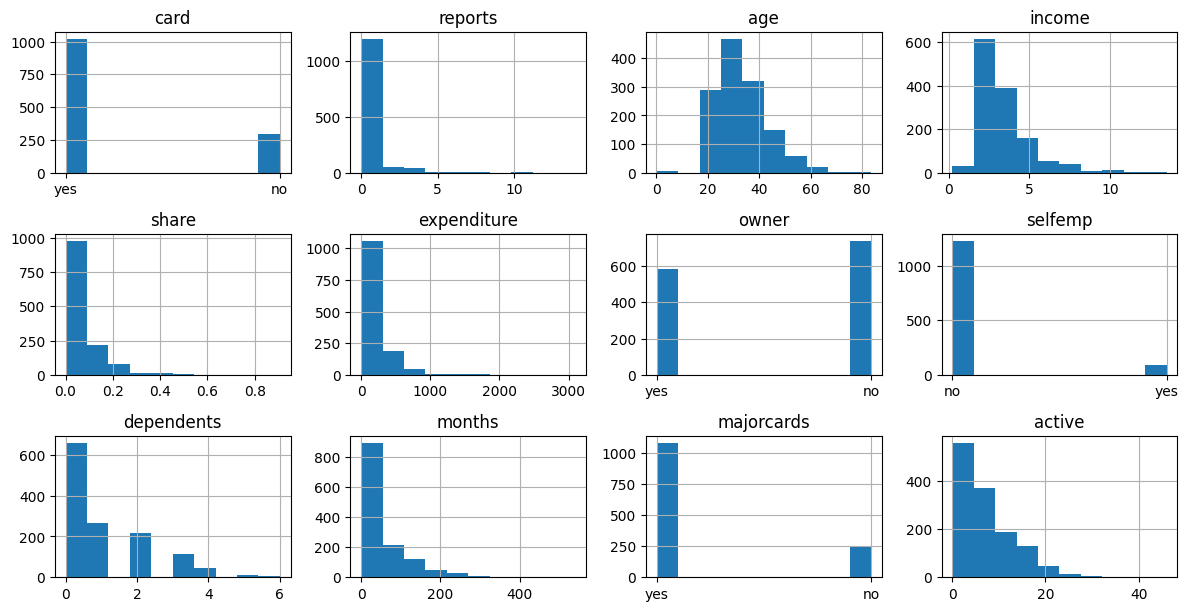

In [9]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(df, df.columns, 4, 4)

- Typically, a plot like this belongs in the appendix where the reader can look if they want more detail than you provide in the body of the report
    - We will give similar information in the body of the report with the table above


- Thoughts on plots:
    - age has some very small values
    - reports is heavily skewed left
    - Everything else looks normal to me
    - reports is the outcome and because of it's unique distribution
    - Want to illustrate the distribution of reports in body of report so I will take more time to make it look nice
    
- Counting number of rows with `age < 18` then removing
    - This should mentioned in results

In [10]:
print(f'Number of rows with age < 18: {sum(df.age < 18)}')
df1 = df[df.age >= 18]

Number of rows with age < 18: 7


- creating histogram of reports for body of report
    - anything in the body of the report should be publication quality

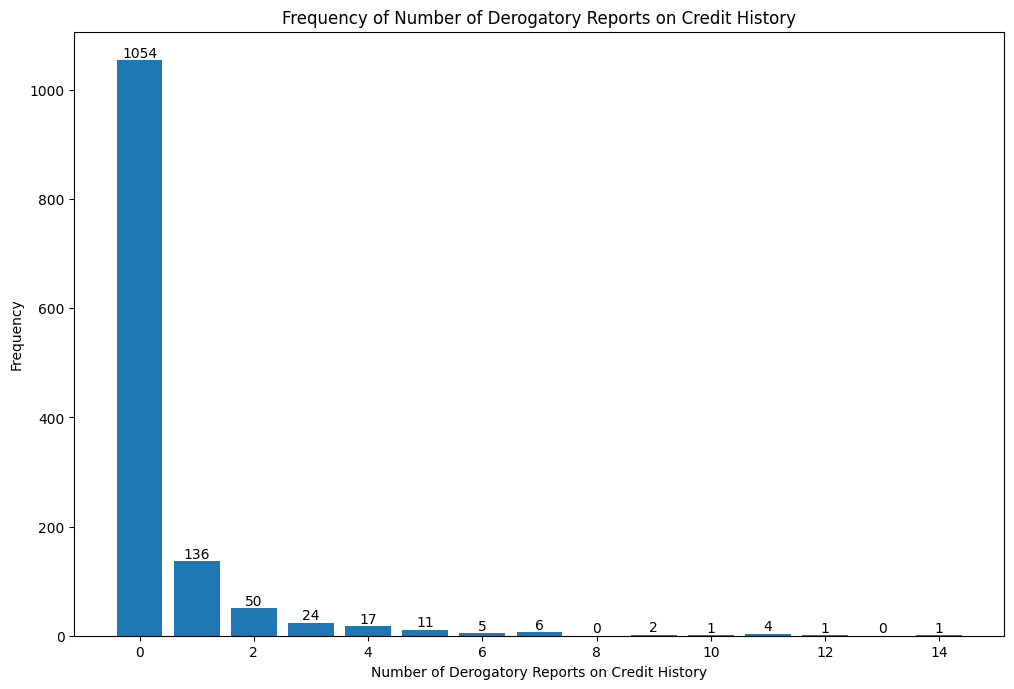

In [11]:
rep_range = df1.reports.max()+1
counts = df1.reports.value_counts(sort=False).reindex(range(rep_range), fill_value=0)
plt.bar(range(rep_range), counts)
for index, value in enumerate(counts):
    plt.text(index, value, str(value), horizontalalignment='center', 
             verticalalignment='bottom')
plt.title('Frequency of Number of Derogatory Reports on Credit History')
plt.ylabel('Frequency')
plt.xlabel('Number of Derogatory Reports on Credit History')
plt.show()

- The plot above does not make a good use of space (the majority of the plot is empty space)
- We can fix this with a broken barplot (below)

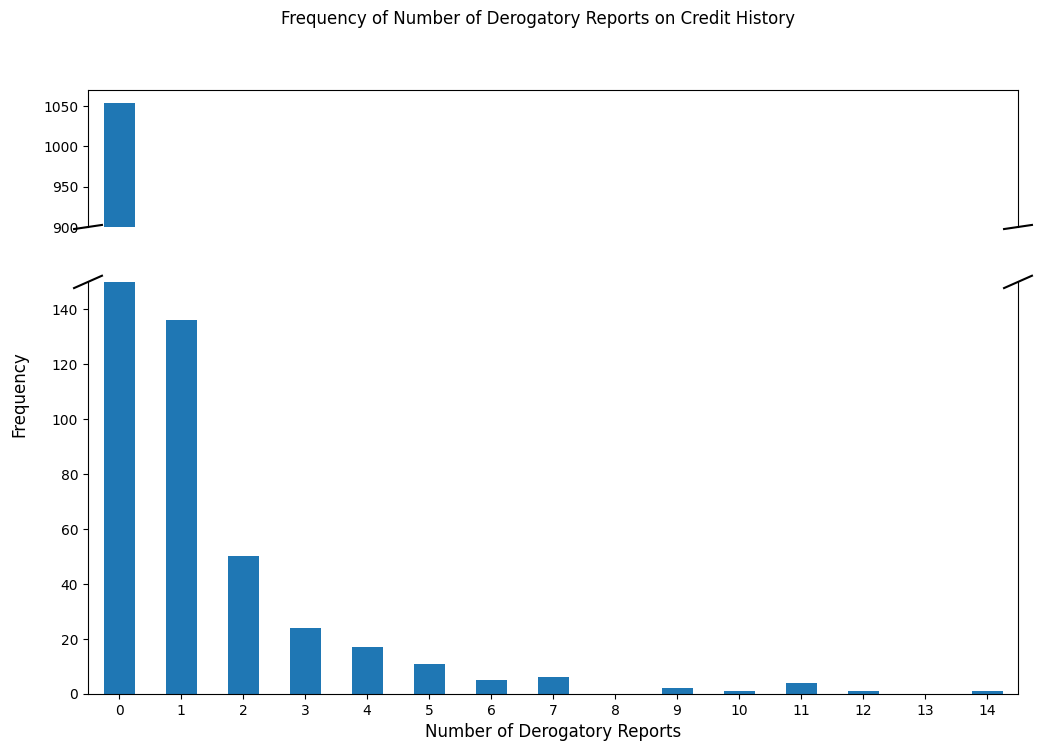

In [12]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,
                             gridspec_kw={'height_ratios': [1, 3]})
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim(0,150)
ax1.set_ylim(900,1070)
ax1.set_yticks(np.arange(900,1071,50))
counts.plot(ax=ax1,kind='bar')
counts.plot(ax=ax2,kind='bar')
for tick in ax2.get_xticklabels():
    tick.set_rotation(0)
d = .015  
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
ax2.set_xlabel('Number of Derogatory Reports', size = 12)
fig.suptitle('Frequency of Number of Derogatory Reports on Credit History')
fig.text(0.06, 0.5, 'Frequency', va='center', rotation='vertical', size=12)
plt.show()

#### Scatter plots

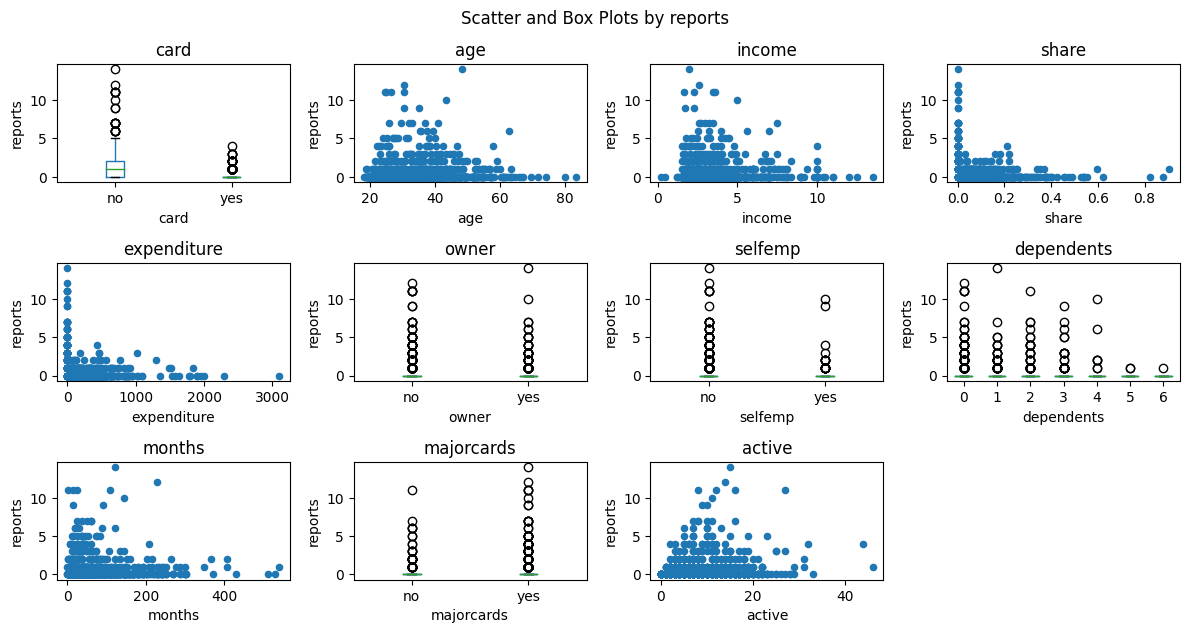

In [13]:
def draw_outcome_plots(df, outcome, n_rows, n_cols):
    fig=plt.figure()
    variables = df.columns.drop(outcome)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        if len(df[var_name].unique()) > 10:
            df.plot.scatter(x= var_name, y= outcome, ax=ax)
        else:
            df.boxplot(column=outcome, by=var_name, grid = False, ax=ax)
            ax.set(ylabel=outcome)
        ax.set_title(var_name)
    fig.suptitle('Scatter and Box Plots by '+outcome)
    fig.tight_layout()
    plt.show()

draw_outcome_plots(df1, 'reports', 4, 4)

### pairwise correlations

- It's helpful to look at pairwise correlations


- Question: Why do we care about this?

    a. There will be redundancy in the regression design matrix
    
    b. Regression variance inflation
    
    c. We don't care about this

In [14]:
df1.corr()

,reports,age,income,share,expenditure,dependents,months,active
reports,1.000000,0.041255,0.010545,-0.158574,-0.136273,0.020255,0.048446,0.208139
age,0.041255,1.000000,0.330573,-0.115791,0.016491,0.219071,0.454619,0.185389
income,0.010545,0.330573,1.000000,-0.053676,0.281571,0.317409,0.130519,0.181094
share,-0.158574,-0.115791,-0.053676,1.000000,0.838731,-0.084685,-0.054287,-0.025525
expenditure,-0.136273,0.016491,0.281571,0.838731,1.000000,0.050465,-0.028117,0.053160
dependents,0.020255,0.219071,0.317409,-0.084685,0.050465,1.000000,0.049151,0.105744
months,0.048446,0.454619,0.130519,-0.054287,-0.028117,0.049151,1.000000,0.101594
active,0.208139,0.185389,0.181094,-0.025525,0.053160,0.105744,0.101594,1.000000


**Coding tip: DRY - Don't Repeat Yourself**

## Generalized Linear Models
- Robust class of models that are frequently used in classical statistics


- Models a function of conditional expectation as a linear function:
$$g(E[Y|X=x])=\beta_0+\beta_1x_1+\dots+\beta_px_p$$


- $g$ called a link function and should be invertible
$$E[Y|X=x]=g^{-1}(\beta_0+\beta_1x_1+\dots+\beta_px_p)$$


- Most common link functions are $g(x)=x$ and $g(x)=\log(x)$


- How is $g(E[Y|X=x])$ different from $E[g(Y)|X=x]$?


- Two examples:
 * *Gaussian linear model:* 
 * *Poisson log-linear mode:*
 
 
- In general, which model to use depends on the distribution of $Y$


- GLMs specify both conditional mean structure and conditional variance structure


- example: $Y|X=x\sim \text{Poisson}(x)$ then $E[Y|X]=x$ and $\text{Var}[Y|X]=x$


- Can we use a Poisson model if $E[Y|X]\neq\text{Var}[Y|X]$ in data?  Yes


- Overdispersion: $\text{Var}[Y|X]=\phi E[Y|X]$ for $\phi\geq 0$
 
 
- In general, data does not need to be perfect to use a model


- Common GLMs:
    - Binomial (logistic)
    - Poisson
    - Negative Binomial
    - Gaussian
 
 
- Which model should we try for the bike count data?

### Poisson Regression and Parameter Estimation
- Random sample $(y_1, x_1), \dots, (y_n, x_n)$
 * $x_i=[1, x_{i1}, \dots, x_{ip}]$ where we include the 1 for the intercept
 
 
- Recall the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) gives the probability of a given number of independent events occurring in a fixed space or time at a constant rate
    - Example: number of calls received per hour at call center or number of people arriving at a restaurant
    - PDF: $p(x) = \frac{\lambda^x}{x!}\exp(-\lambda)$
    - Expected value: $E[X] = \lambda$
    
    
- Assume $\log E[Y|X=x]=\beta^T x$ so that $\lambda = \exp(\beta^Tx)$
and
$$\begin{align}
p(y|x;\beta)
&=\frac{\lambda^y}{y!}\exp(-\lambda) \\
&= \frac{\exp\left(y\beta^T x\right)}{y!}\exp\left(-\exp(\beta^T x)\right)
\end{align}$$


- Want to estimate $\beta$; use log-likelihood:
$$
\begin{align}
\ell(\beta) 
&= \log\left(\prod_{i=1}^n p(y_i|x_i;\beta)\right) \\
&= \log\left( \prod_{i=1}^n \frac{\exp\left(y_i\beta^T x_i\right)}{y!}\exp\left(-\exp(\beta^T x_i)\right) \right)\\
&= \sum_{i=1}^n \left(y_i \beta^T x_i - \log(y_i!) -\exp(\beta^T x_i)\right)
\end{align}
$$


##### Optimization

- Want to find $\beta^* = \arg\max_\beta \ell(\beta)$


- Remember that $\log p \leq 0$ because $p \leq 1$
    - Because $\log x$ is monotonically increasing, so maximize $p$ if and only if maximize $\log p$ ($\log p \leq 0$, trying to get close to zero)


- Intuition: Set $\frac{\partial}{\partial \beta}\ell(\beta) =0$ and solve


- Here $\nabla\ell(\beta)=0$ is not simple to solve


- Because $-\nabla^2 \ell(\beta)$ [semi-positive definite](https://en.wikipedia.org/wiki/Definite_symmetric_matrix) matrix, we know that $-\ell(\beta)$ is a convex function

<img src="./convex.png" width="300">


We can use a convex optimization technique such as [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent):


   1. Calculate $\nabla \ell(b)$ where $b\in\mathbb{R}^{p+1}$
 $$
 \nabla \ell(b) = \sum_{i=1}^n y_i x_i - x_i \exp(b^T x_i)
 $$
 
 
   2. Choose a starting point $b_0$ in the $\mathbb{R}^{p+1}$ (the space where $\beta$ is)
 
 
   3. Choose a step size, $\gamma$
 
 
   4. Algorithm, step $j$:
    $$b_{j+1} \leftarrow b_j+\gamma \nabla\ell(b_j)$$
 
 
   5. Stop algorithm when $\ell(b_j)\geq \ell(b_{j+1})$ 
 
 
   6. Set $\beta \leftarrow b_j$
 
 
 Note: It's more common to make $\gamma$ decrease as the algorithm progresses
 
 <img src="./Gradient_descent.svg.png" width="300">
 
Image from Wikipedia


- Why not use [Newton-Raphson](https://en.wikipedia.org/wiki/Newton's_method)?


- In step 4, why are we adding for gradient descent?


### Model fitting in practice
- In many settings, the goal is to understand associations with an outcome


- The goal is not to fit the perfect model


- Even though GLMs are association models, investigators will use these models to attempt to explain a causal relationship using expert subject-matter knowledge


- Many researchers will always want to see the variable of interest in the model, even when it does not improve model fit


- In some cases, researcher also want more information (more variables) 


- Model selection often needs to be a discussion to determine how to meet the goals of the current work


- Often, there is room for several good models


- Good idea to run *sensitivity analyses*: changing model/assumptions to understand how *robust* outcomes are under varying models/assumptions



### Regression Modeling

- In this case, we don't have a lot of information about what the client wants other than generally understand how each variable is associated with the outcome


- Because there are not a lot of variables and many rows, it's not a problem to include them all
    - There is no rule on how large $\frac{n}{p}$ needs to be
    - $n=$ number of rows, $p=$ number of parameters to estimate


- Note that because `share = expenditure / income` we can exclude one ([multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity))


- Again, this data was used to decide if an applicant should be approved for a credit card, and it seems likely that the number of derogatory reports would influence credit card approval.  Because of this, we need to exclude the `card` variable.


- Remember, when using a software package for the first time, look over the [documentation](https://www.statsmodels.org/stable/glm.html)



In [15]:
expr = '''reports ~ age + income + expenditure + owner + 
        selfemp + dependents + months + majorcards + active'''
fit1 = sm.GLM.from_formula(
    expr, data=df1, family=sm.families.Poisson()).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                reports   No. Observations:                 1312
Model:                            GLM   Df Residuals:                     1302
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1272.5
Date:                Thu, 06 Jan 2022   Deviance:                       1897.6
Time:                        10:29:36   Pearson chi2:                 6.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.1482      0.181     -6.360      0.000      -1.502      -0.794
owner[T.yes]         -0.7820      0.103     -7.610      0.000      -0.983      -0.581
selfemp[T.yes]       -0.0237      0.150     -0.158      0.875      -0.318       0.271
majorcards[T.yes]    -0.0309      0.106     -0.292      0.770      -0.238       0.176
age                   0.0008      0.005      0.167      0.867      -0.009       0.010
income                0.0658      0.027      2.481      0.013       0.014       0.118
expenditure          -0.0038      0.000    -10.372      0.000      -0.005      -0.003
dependents            0.0882      0.036      2.478      0.013       0.018       0.158
months                0.0024      0.001      3.818      0.000       0.001       0.004
active                0.0768      0.005     16.554      0.000       0.068       0.086
=====================================================================================
"""

- Question: Can we put the table above in the body of a report?
    - a) yes
    - b) no
    - why?


- What might be problematic with this model above?


- What might happen if we include `card` as a variable?

#### Overdispersion

- Again, assuming Poisson distributed data assumes
$$E[Y|X;\beta]=\text{Var}[Y|X;\beta]$$


- If this does not hold, the parameter point estimates will still be accurate but the variance and confidence intervals will be off


- Variance is important for inference (statistical significance) but if the goal is prediction, having the correct variance structure is not as important


- For *statistical inference*, we need to focus on the mean and variance models


- Question: Do we *always* need to the variance to be approximately correct?
    - a) yes
    - b) no


- In the statsmodels python module, setting `scale="X2"` in the [`fit` method](https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLM.fit.html) estimates the scale parameter as Pearson’s chi-square divided by df_resid for the entire sample


- Using this, we allow $\text{Var}[Y|X;\beta]=\phi E[Y|X;\beta]$ for $\phi>0$


- Note: This is no longer a likelihood-based model, but rather quasi-likelihood, so it is not appropriate to use AIC to compare


- Quasi-likelihood objective function
$$Q(\beta) = \sum_i \frac{(y_i-\mu_i(\beta))^2}{\phi \text{Var}(\mu_i(\beta))}$$
where $\mu_i(\beta)$ is the model fitted value and $\text{Var}(\mu_i(\beta))$ is the model variance


- Use its gradient for optimization
$$\nabla_\beta Q = \sum_i \nabla_\beta \mu_i(\beta)\frac{2(y_i-\mu_i(\beta))}{\text{Var}(\mu_i(\beta))}$$


- We can use Quasi-AIC (QAIC or QIC) to compare different quasi-likelihood-based models


- The scale parameter is estimated as 
$$\hat \phi = \sum_i \frac{(y_i-\hat\mu_i)^2}{(n-p)V(\hat\mu_i)}$$


- Because this is count data, it probably follows some conditional Poisson distribution given all the necessary variables and transformations


- It may be possible to construct a model with $\hat\phi\approx 1$



In [16]:
fitOD = sm.GLM.from_formula(
    expr, data=df1, family=sm.families.Poisson()).fit(scale="X2")
fitOD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                reports   No. Observations:                 1312
Model:                            GLM   Df Residuals:                     1302
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          5.2256
Method:                          IRLS   Log-Likelihood:                -243.52
Date:                Thu, 06 Jan 2022   Deviance:                       1897.6
Time:                        10:29:36   Pearson chi2:                 6.80e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.1482      0.413     -2.782      0.005      -1.957      -0.339
owner[T.yes]         -0.7820      0.235     -3.329      0.001      -1.242      -0.322
selfemp[T.yes]       -0.0237      0.344     -0.069      0.945      -0.697       0.650
majorcards[T.yes]    -0.0309      0.242     -0.128      0.898      -0.504       0.443
age                   0.0008      0.011      0.073      0.942      -0.021       0.023
income                0.0658      0.061      1.085      0.278      -0.053       0.185
expenditure          -0.0038      0.001     -4.537      0.000      -0.005      -0.002
dependents            0.0882      0.081      1.084      0.278      -0.071       0.248
months                0.0024      0.001      1.670      0.095      -0.000       0.005
active                0.0768      0.011      7.241      0.000       0.056       0.098
=====================================================================================
"""

- In the model above, the scale parameter = 133 >> 1 indicating overdispersion


- There are tests, but a reasonable heuristic is $\hat\phi > 1.5$


- Notice that the 'coef' estimates between both models are similar but the 'std err' values are very different


- std err from the overdispersion model $=SE_{OD}(\hat\beta)= \sqrt{\hat\phi} SE(\hat\beta)$ where $SE(\hat\beta)$ is the std err from the Poisson model


- Comparing quasi-likelihood-based models, we can use QAIC
$$QAIC = -2Q_j+2p_j$$
where $QAIC_j$ and $p_j$ are the quasi-likelihood and parameter count for model $j$



**Negative Binomial Regression**

- Another option is to assume a negative binomial (NB) distribution


- What does [negative binomial](https://en.wikipedia.org/wiki/Negative_binomial_distribution) actually model?
    - a) number of successes in a sequence of $n$ independent Bernoulli trials
    - b) number of independent events occurring in a fixed interval of time or space with a constant rate
    - c) number of successes in a sequence of independent Bernoulli trials before a specified number of failures occurs
    - d) number of successes in n draws, without replacement, from a finite population of size $N$ that contains exactly $K$ successes


- While it's clear that the count data do not have a NB distribution, this model gives more flexibility for modeling variance than Poisson


- Remember: Our goal is to quantify the relationship between the variables and the outcome
    - The model we present will almost certainly not be perfect but it can still be helpful


- NB relaxes the assumption that $E[Y|X]=\text{Var}[Y|X]$


- If $Y|X\sim\text{Negative Binomial}(r,p)$ then
$$\text{Var}[Y|X] = E[Y|X]+\alpha E[Y|X]^2$$


- Technically, NB can also be modeled with overdispersion as well
    - We would probably not use here
    - Why?



In [17]:
fitNB = sm.GLM.from_formula(
    expr, data=df, family=sm.families.NegativeBinomial()).fit()
fitNB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                reports   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1309
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1046.5
Date:                Thu, 06 Jan 2022   Deviance:                       1143.1
Time:                        10:29:36   Pearson chi2:                 3.21e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.6513      0.231     -7.144      0.000      -2.104      -1.198
owner[T.yes]         -0.8105      0.131     -6.207      0.000      -1.066      -0.555
selfemp[T.yes]        0.0143      0.200      0.072      0.943      -0.378       0.407
majorcards[T.yes]     0.0091      0.142      0.065      0.948      -0.268       0.287
age                   0.0040      0.006      0.638      0.523      -0.008       0.016
income                0.0801      0.035      2.289      0.022       0.012       0.149
expenditure          -0.0030      0.000     -7.942      0.000      -0.004      -0.002
dependents            0.0893      0.046      1.943      0.052      -0.001       0.179
months                0.0023      0.001      2.788      0.005       0.001       0.004
active                0.1031      0.008     13.412      0.000       0.088       0.118
=====================================================================================
"""

- Using AIC to choose a model: smaller is better
 

 
- Why can we use AIC to compare Poisson regression to Negative Binomial Regression?


- Question: Can compare any likelihood-based models with AIC/BIC?
    - a) yes
    - b) no


- Question: Could we do this with deviance?
    - a) yes
    - b) no


- What about comparing QAIC and AIC?



In [18]:
print(f'Poissson AIC: {round(fit1.aic)}')
print(f'Negative Binomial AIC: {round(fitNB.aic)}')

Poissson AIC: 2565
Negative Binomial AIC: 2113


### Diagnostics
- These are some general diagnostic visuals


- They tend to be somewhat subjective


- But, they are very helpful for finding influential points



NameError: name 'bikePoisOD' is not defined

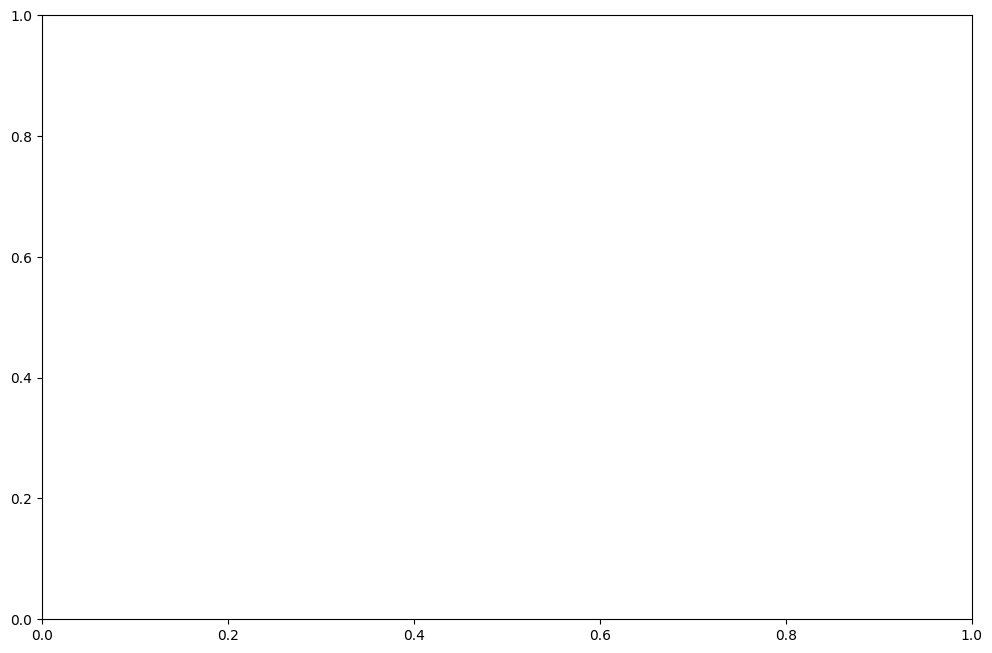

In [19]:
fig, ax = plt.subplots()
ax.scatter(bikePoisOD.fittedvalues, df['BB_COUNT'])
line_fit = sm.OLS(
    df['BB_COUNT'], 
    sm.add_constant(bikePoisOD.fittedvalues, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax, color='r')
ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

In [ ]:
fig, ax = plt.subplots()
ax.scatter(bikePoisOD.fittedvalues, bikePoisOD.resid_pearson)
ax.hlines(0, 4e3, 1, color='r')
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

In [ ]:
fig, ax = plt.subplots()
ax.scatter(bikePoisOD.fittedvalues, bikePoisOD.resid_deviance)
ax.hlines(0, 4e3, 1, color='r')
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Deviance Residuals')
ax.set_xlabel('Fitted values')

### Choosing a model

- Choosing a model can be difficult


- Important: All models are *wrong*, but some are helpful


- Consider how well *you* understand the model and can *communicate* the findings


- Consider using other model (not in body of report) as sensitivity analysis


- People are *always* developing new (complicated) methods to tackle very specific data problems
    - It is ok (good) to use a simple model even if it is not perfect
    

- If you notice a problem with the data, use Google (search engine) to find solutions
    - Consider the time it might take you to implement a better method and evaluate the pay off

### Communicating Findings
- Opinion: most common mistake is not considering the audience
 - Which details will be helpful and which will be lost?
 - What kinds of graphics will make explanations more clear or give more useful information?
 
**Suggestions for Intro**

- First sentence should introduce the subject-matter in a way that a 5-year old can understand but addresses your client's needs
- Second sentence should focus more on the problem at hand
- Next, what is the problem you are trying to answer?
- Without using jargon, how will you address it?
- In one sentence, what is the most important finding?
- Example for this analysis:

Cycling in and out of Manhattan is commonplace.  However, the daily number entering and leaving by bicycling on any given day is likely influenced by external factors such as weather and time.  This analysis explains the daily count of cyclists crossing the Brooklyn Bridge in terms of external factors.  The models show that several factors are associated with the number of daily crossings, including temperate, weekend, and month.

- Someone who has no idea about your work should be able to follow and understand your first paragraph

**Suggestions for method**

- In this section, you should describe the methods that you used, specifically, how it is appropriate for the data
- The level of detail for this section will vary depending on the audience
- It's typically easier to go into too much detail - more appropriate for a technical audience
- For this class, you should assume that the audience is a subject-matter expert, but without a background in statistics
- For this class, stay away from jargon
 - Example of what not to do: Due to the covariance structure among the observation, we used a mixed-effects model.
 - There are likely many setting where this is appropriate, but in others, this type of language will confuse readers
 - Instead, try to explain the problems
 - Better: This data is includes many observations from individuals over time.  To account for this, we used a mixed-effects model.
- Explain why you modeled the data as done
- Brief example for this analysis:

In this analysis, we aim to determine which external factors are associated with number of daily cyclist crossings and quantify the degree of each association.  Because the outcome for this analysis is count data (daily cyclists crossings), we primarily use Poisson regression to model this daily count with respect to the external factors provided in the data.  As our goal is to broadly understand associations with the outcome, we include all explanatory variables available in the data in our regression model.  This is reasonable because the ratio of rows to columns for the data is large.

We compare several different models to ensure an optimal fit for the model shown below using likelihood-based and quasi-likelihood based metrics.  We choose the model with best fit but association estimates are similar for all models.  We do not consider transforming any variables to further improve fit to make the model easily interpretable after considering model diagnostics.

- Use "we" if you are working on a team, "I" if you're working alone
- I typically avoid passive voice (Poisson regression was used...) in favor of active voice (We/I used Poisson regression..).

**Results**

- Begin the results with a high-level overview of the data without modeling, e.g. number of rows, columns
- Provide table of distribution metrics (mean, standard deviation, or median, IQR)
- Because this dataset is small and simple, it may be reasonable to describe in words.
- If you need to drop observations because they're not appropriate for your purpose, or missing data, etc, a diagram is helpful, especially when rows indicate individual data.
- Graphics are often very powerful for communicating ideas
    - there should be a lot of graphics in your appendix to help you understand the data, from these, choose one or two that directly answers the question of interest
- Provide a table of regression parameters transformed for easy interpretation, e.g. show exp(beta)
    - Model: $E[Y|X=x] = \exp(\beta x)$, present $\exp(\beta)$, not $\beta$
    - Using delta method, we can also transform the confidence intervals
- In words, clearly explain how to interpret the parameters by explaining a couple.
- Brief example of results:

The full data include 214 daily high and low temperature, precipitation, date, and cyclist count between April 1, 2017 and October 31, 2017 with no missing values for any of these variables.  We use all rows of data for the analysis.

The data shows an average (std.) of 2680 (855) crossings.  The average (std.) high and low temperature is 74 (10) and 62 (9) degrees Fahrenheit, respectively.  The average precipitation is 0.13 (0.4), unclear unit in data.

To explain day-to-day fluctuations in number of crossings, we look at several models.  Of the models we consider, we choose to report a Poisson regression model allowing for overdispersion.  We chose a Poisson model because of its simplicity to understand and because we are modeling counts within a fixed period of time.  However, it is clear that allowing for overdispersion was necessary to more accurately estimate standard errors due to the high conditional variance compared to the conditional expectation.  Table 1 below provides rate estimates along with 95% confidence intervals and p-values.  The model shows that there is a statistically significant decrease in the number of crossings with precipitation (p<0.001); for each unit increase in precipitation, crossings decrease by a factor of 0.46.  Further, there is a statistically significant increase in number of daily crossings with temperature (p<0.001); for each 10 degree increase in Fahrenheit, on average the number of crossings increase by a factor of 1.28.

| Variable | Rate (95% CI) | p-value |
| --- | --- | --- |
| May vs Apr | 1.10 (0.97, 1.24) | 0.137 |
| Jun vs Apr | 1.16 (1.01, 1.33) | 0.040 |
| Jul vs Apr | 1.14	(0.98, 1.32) | 0.097 |
| Aug vs Apr | 1.25	(1.08, 1.43) | 0.002 |
| Sep vs Apr | 1.16	(1.02, 1.32) | 0.027 |
| Oct vs Apr | 1.11	(0.98, 1.25) | 0.094 |
| Weekend vs Weekday | 0.89 (0.83, 0.95) | 0.001 |
| High Temp (per 10 deg F) | 1.28 (1.20, 1.37) | <0.001 |
| Low Temp (per 10 deg F) | 0.83 (0.76, 0.90) | 0.000 |
| Day of Month | 1.00 (1.00, 1.00) | 0.697 |
| Precipitation | 0.46 (0.40, 0.54) | 0.000 |

Table 1: The table above shows rate ratios (and 95% confidence intervals) for the number of cyclists crossing the Brooklyn bridge each day along with p-values for each factor assessed.

**Conclusion**

- Restate what you attempted to answer
- State any potential limitations
- Summarize finds for the purpose of the analysis
- Brief example:

Our purpose for this analysis is to simply explain the daily number of cyclists crossing the Brooklyn Bridge in terms of factors such as temperature and precipitation.  While it seems likely that there may be other external variable that would further improve our models, such as events in the city or subway delays, this model seems characterize crossings well.  That is, precipitation, temperature, and weekdays, for example, are certainly associated, if not contribute to the number of daily crossings.

In [ ]:
params = pd.DataFrame({'Rate': bikePoisOD.params})
ci_table = bikePoisOD.conf_int().rename(columns={0:"Lower", 1:"Upper"})
bike_table = params.join(ci_table).applymap(np.exp).round(2)
bike_table['pvalue'] = bikePoisOD.pvalues.round(3)
bike_table

Question: There is always a single best model
- a) True
- b) False


Question: In order to use AIC, I must understand the underlying math
- a) True
- b) False


Check-in: How do you feel about the first assignment?
- a) Good, I understand the expectations and I feel that I have the skills to do a good job
- b) Unsure, I understand the expectations but I feel that I'm missing some of the skills necessary to do a good job
- c) Not good, I am unclear of the expectations